In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
px_tsla = pd.read_csv('sample_data/tsla_price.csv')
px_msft = pd.read_csv('sample_data/msft_price.csv')

In [13]:
startDate = '2020-12-31'
px_tsla = px_tsla[px_tsla['Date'] >= startDate].copy()
px_msft = px_msft[px_msft['Date'] >= startDate].copy()
px_tsla['return'] = px_tsla['Close'].pct_change()
px_msft['return'] = px_msft['Close'].pct_change()

Text(0, 0.5, 'msft price')

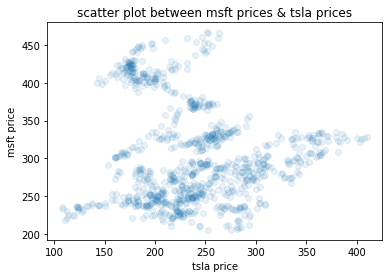

In [12]:
plt.title('scatter plot between msft prices & tsla prices')
plt.scatter(px_tsla['Close'], px_msft['Close'], alpha=0.1)
plt.xlabel('tsla price'); plt.ylabel('msft price')

for purpose fo investment analysis, we care a lot about the price movement, not price itself
<br>look at this example, if we use price of msft against tsla price, the statistical relationship seem to be weak
<br>if we look at the return, the relationship is much stronger

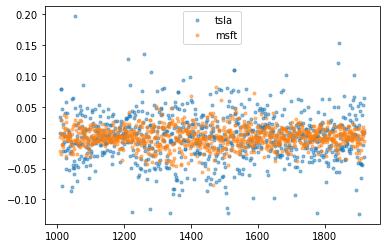

In [33]:
plt.plot(px_tsla['return'], linestyle='', marker='.', alpha=0.5, label='tsla')
plt.plot(px_msft['return'], linestyle='', marker='.', alpha=0.5, label='msft')
plt.legend()

Text(0, 0.5, 'msft return')

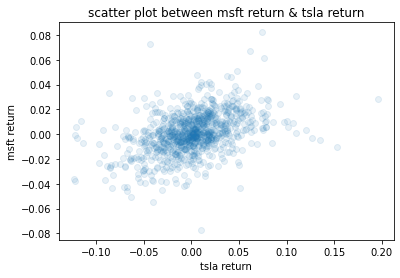

In [15]:
plt.title('scatter plot between msft return & tsla return')
plt.scatter(px_tsla['return'], px_msft['return'], alpha=0.1)
plt.xlabel('tsla return'); plt.ylabel('msft return')

In [19]:
np.corrcoef(px_tsla['Close'].dropna(), px_msft['Close'].dropna())

array([[ 1.        , -0.09712603],
       [-0.09712603,  1.        ]])

In [18]:
np.corrcoef(px_tsla['return'].dropna(), px_msft['return'].dropna())

array([[1.        , 0.42146683],
       [0.42146683, 1.        ]])

In [25]:
linreg = LinearRegression()
trendline = linreg.fit(np.array(px_tsla['return'].dropna()).reshape(-1,1), px_msft['return'].dropna())

In [27]:
trendline.intercept_

0.0007568629657633706

In [26]:
trendline.coef_

array([0.1910472])

with the small coefficient for 2 reasons:
<br>1. correlation of return of tsla and msft is only 0.42
<br>2. return of msft is less volatile than return of tsla